In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Z test
### Similar to T test but the distribution follows
### z or normal distribution if the sample size is >= 30

In [37]:
from scipy.stats import norm

### Generating a Population

In [38]:
pop_mean=25
pop_std=30
pop_size=1_00_000

In [39]:
np.random.seed(123)
pop=np.random.normal(loc=pop_mean,
                     scale=pop_std,size=pop_size)
print(pop[:10])

[ -7.5689181   54.9203634   33.48935494 -20.18884142   7.64199244
  74.54309611 -47.8003773   12.13262113  62.97808776  -1.00221207]


### Extracting a sample

In [40]:
sample_size=500
np.random.seed(123)
sample=np.random.choice(pop,size=sample_size)
print("samples",sample[:10])
sample_mean=np.mean(sample)
print("Mean of the samples ",sample_mean)

samples [ 31.0199469  109.59719132  29.49145446 -15.75025585  19.19351326
  62.30673661  -7.81839642  39.48893064  16.41863051 -14.84027253]
Mean of the samples  24.547698264765508


D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


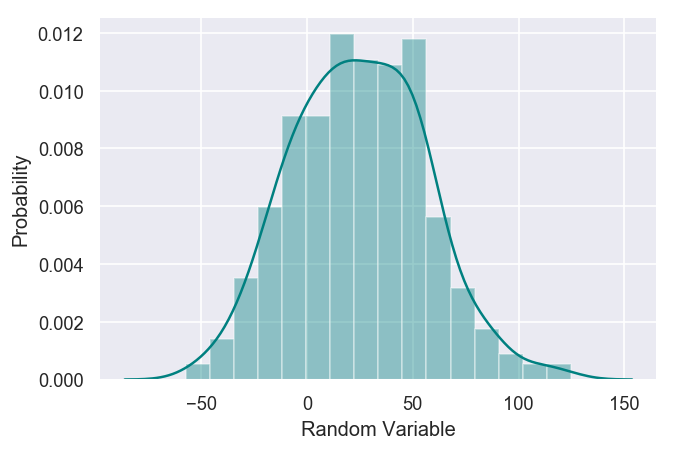

In [41]:
plt.figure(dpi=120)
sns.distplot(sample, color='teal')
plt.xlabel("Random Variable")
plt.ylabel("Probability");

# Q Does the sample have the Characterstics of the Population
### Is the mean of the Sample equal to the mean of the population

Null Hypothesis

$ H_0 : \mu = 25 $

Alternative Hypothesis

$ H_1 :\mu \neq 25$

### Calculation of Standard Error for Mean

$ S.E.=\frac{\sigma}{\sqrt(n)} $

s - Population SD

n - Number of samples

In [42]:
SE = pop_std/np.sqrt(sample_size)
print("Standard Error SE ",SE)

Standard Error SE  1.3416407864998738


### Calculation of Z statistics

$\Large z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$

or 

$\Large z=\frac{\bar{x} - \mu}{S.E}$

$\bar{x}$ - Sample Mean

$\mu$ - Population Mean

$s$ - Standard deviation of population

$n$ - Sample size

$S.E.$ - Standard Error for Mean

In [43]:
zstatistics=(sample_mean-pop_mean)/SE
print("Zstatistics is ",zstatistics)

Zstatistics is  -0.3371258087751455


### Finding the Z critical value

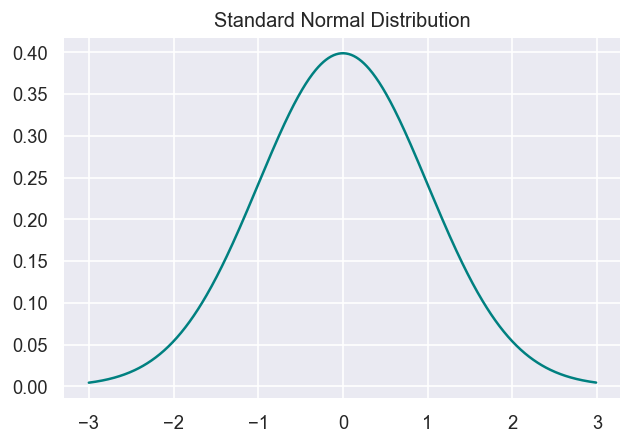

In [44]:
x=np.arange(-3,3,0.01)
y=norm.pdf(x=x)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.title("Standard Normal Distribution")
plt.show()

In [45]:
significant=0.05
zcritical_l=norm.ppf(q=significant/2)
zcritical_u=-zcritical_l
print("Critical Values are ",zcritical_l,zcritical_u)

Critical Values are  -1.9599639845400545 1.9599639845400545


### Computing the shaded region

In [46]:
xshade_l=np.arange(-3,zcritical_l,0.01)
yshade_l=norm.pdf(x=xshade_l)

xshade_r=np.arange(zcritical_u,3,0.01)
yshade_r=norm.pdf(x=xshade_r)

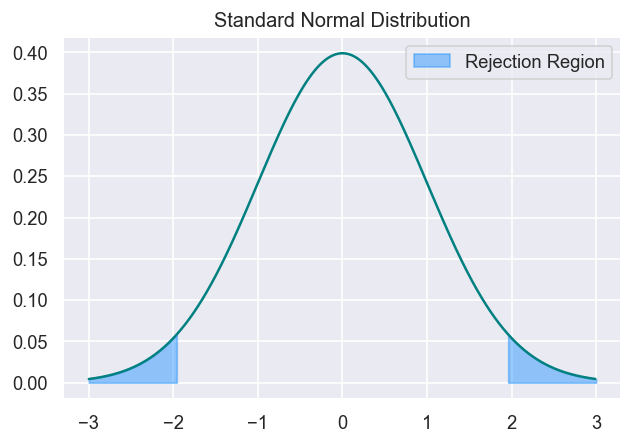

In [48]:
x=np.arange(-3,3,0.01)
y=norm.pdf(x=x)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.title("Standard Normal Distribution")
plt.legend()
plt.show()

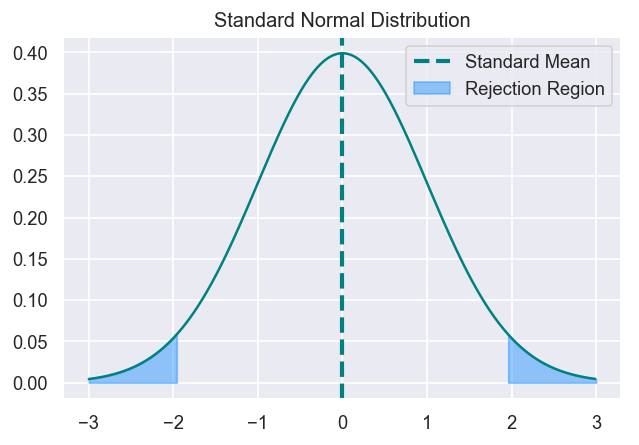

In [49]:
x=np.arange(-3,3,0.01)
y=norm.pdf(x=x)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.axvline(x=0, linestyle='--', linewidth=2.5, label="Standard Mean", c='teal')
plt.title("Standard Normal Distribution")
plt.legend()
plt.show()

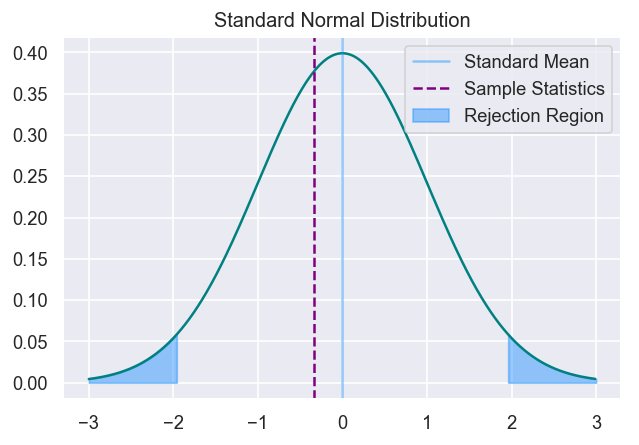

In [50]:
x=np.arange(-3,3,0.01)
y=norm.pdf(x=x)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.axvline(x=0, linestyle='-', linewidth=1.5, label="Standard Mean", c='dodgerblue',alpha=0.45)
plt.axvline(x=zstatistics, linestyle='--', linewidth=1.5, label="Sample Statistics", c='purple')
plt.title("Standard Normal Distribution")
plt.legend()
plt.show()

###  Confidence Interval
$C.I. =\bar{x} \pm SE * critical_\frac{\alpha}{2}$

In [51]:
CI_l=pop_mean+(zcritical_l*SE)
CI_u=pop_mean+(zcritical_u*SE)

print("Confidence Interval\nLower limit",CI_l,
     "\nUpper limit",CI_u)

Confidence Interval
Lower limit 22.370432378270255 
Upper limit 27.629567621729745


## Plot in Population Distribution

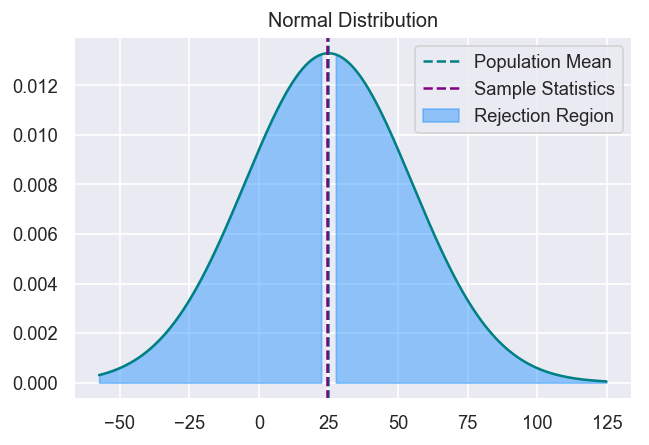

In [52]:
lower=min(sample)
upper=max(sample)

xshade_l=np.arange(lower,CI_l,0.01)
yshade_l=norm.pdf(x=xshade_l,loc=pop_mean,scale=pop_std)

xshade_r=np.arange(CI_u,upper,0.01)
yshade_r=norm.pdf(x=xshade_r,loc=pop_mean,scale=pop_std)

x=np.arange(lower,upper,0.01)
y=norm.pdf(x=x,loc=pop_mean,scale=pop_std)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')

plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.axvline(x=pop_mean, linestyle='--', linewidth=1.5, label="Population Mean", c='teal')
plt.axvline(x=sample_mean, linestyle='--', linewidth=1.5, label="Sample Statistics", c='purple')
plt.legend()
plt.title("Normal Distribution")
#plt.xlim([20,30])
plt.show()

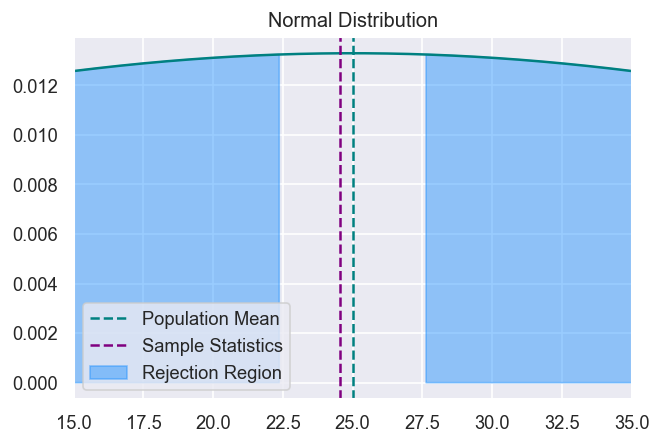

In [53]:
lower=min(sample)
upper=max(sample)

xshade_l=np.arange(lower,CI_l,0.01)
yshade_l=norm.pdf(x=xshade_l,loc=pop_mean,scale=pop_std)

xshade_r=np.arange(CI_u,upper,0.01)
yshade_r=norm.pdf(x=xshade_r,loc=pop_mean,scale=pop_std)

x=np.arange(lower,upper,0.01)
y=norm.pdf(x=x,loc=pop_mean,scale=pop_std)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')

plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.axvline(x=pop_mean, linestyle='--', linewidth=1.5, label="Population Mean", c='teal')
plt.axvline(x=sample_mean, linestyle='--', linewidth=1.5, label="Sample Statistics", c='purple')
plt.legend()
plt.title("Normal Distribution")
plt.xlim([15,35])
plt.show()